<center style="color: violet">

  # Introducing Advanced Deep Learning with Keras

</center>

# 1. Why is Keras the perfect deep learning library?

# 2. MLP, CNN and RNN
## 2.1. The differences between MLP, CNN and RNN
* MLP:
  * Là một **fully connected network**.
  * Còn có tên khác là deep feed-forward network, feed-forward neural network.
  * Được dùng cho các bài toán logistic hoặc regression đơn giản.
* RNN:
  * Dùng giải quyết các bài toán với **sequential data input**.
* CNN:
  * Dùng cho dữ liệu đa chiều như video, image,...

# 3. Multilayer Perceptron (MLP)
## 3.1. The MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

/> Load dataset.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

/> Count the number of unique test labels.

In [3]:
unique, counts = np.unique(y_train, return_counts=True)
print(f"Train labels: {dict(zip(unique, counts))}")

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [4]:
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


/> Get 25 samples from train dataset.

In [5]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

/> plot the 25 mnist digits

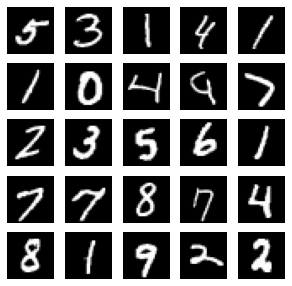

In [6]:
plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.savefig("./data/mnist-samples.png")
plt.show()
plt.close('all')

## 3.2. The MNIST digit classifier model.

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

/> Load dataset.

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

/> Computer the number of labels.

In [9]:
num_labels = len(np.unique(y_train))

/> Convert to one-hot vector.

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

/> Image dimentions (assumed square).

In [11]:
image_size = x_train.shape[1]
input_size = image_size * image_size

print("Input size: {}".format(input_size))

Input size: 784


/> Resize and normalize.

In [12]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

/> Network parameters.

In [13]:
batch_size = 128
hidden_units = 256
dropout = 0.45

/> Mode is a 3 layer MLP with ReLU and dropout after each layer.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

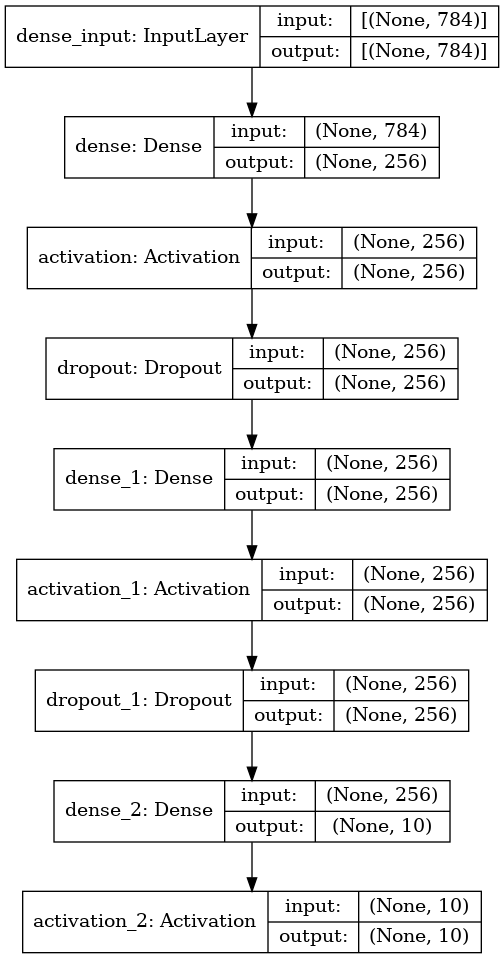

In [14]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

# drop out for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='./data/mlp-mnist.png', show_shapes=True)

/> Loss function for one-hot vector use of adam optimizer and accuracy is good metric for classification tasks.

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/> Train the network.

In [16]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 4s 2ms/step - loss: 0.4255 - accuracy: 0.8686
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1961 - accuracy: 0.9426
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1521 - accuracy: 0.9545
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1286 - accuracy: 0.9608
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9658
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9689
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.9703
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9725
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9733
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9751

/> validate the model on test dataset to determine generalization

In [17]:
_, acc = model.evaluate(x_test, y_test,
                        batch_size=batch_size, verbose=0)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.2%
